# Reserving
## Exercise 1 - Undiscounted premium provision for a single policy

Assume that you have just signed a new insurance cover for a motor liability insurance with a new customer. The customer is paying a premium of 1200 kr and the cover is for one year. Assume that the premium is going to be earned linearly. 

You expect to pay 180 kr of expenses attributed to this policy and the expenses are going to be paid also linearly over a year. 

Regarding the expected claim, your pricing team assesses that the claims can be modelled using compound Poisson model, where the number of claims between time $t$ and $T=1$ can be modelled as $N(t,T)\sim Poiss(\mu(T-t))$, where $\mu=0.01$ and the i-th claim size is modelled as $Z_i\sim \Gamma(32000,4)$ (using shape/rate parametrization.

1. Calculate the expected future profit on unearned exposure of the insurance company, both at sigining of the contract and at each day of the year (assume year has 360 days, month has 30 days). 
2. Assume that the premium is paid upfront. Calculate (undiscounted) premium provision (i.e. Solvency II reserve for un-earned exposure) as well as liability for remaining coverage (i.e. accounting reserve according to IFRS 17) for each day of the year and plot both on the same plot. What is the difference?
3. Assume that the premium is paid monthly upfront. Calculate again (undiscounted) premium provision as well as liability for remaining coverage for each day of the year and plot both on the same plot. Compare it to the point 2.



### Answer point 1
Calculate the expected future profit of the insurance company, both at sigining of the contract and at each day of the year (assume year has 365 days).

[1] "Expected profit at the beginning of the contract:"


[1] 220

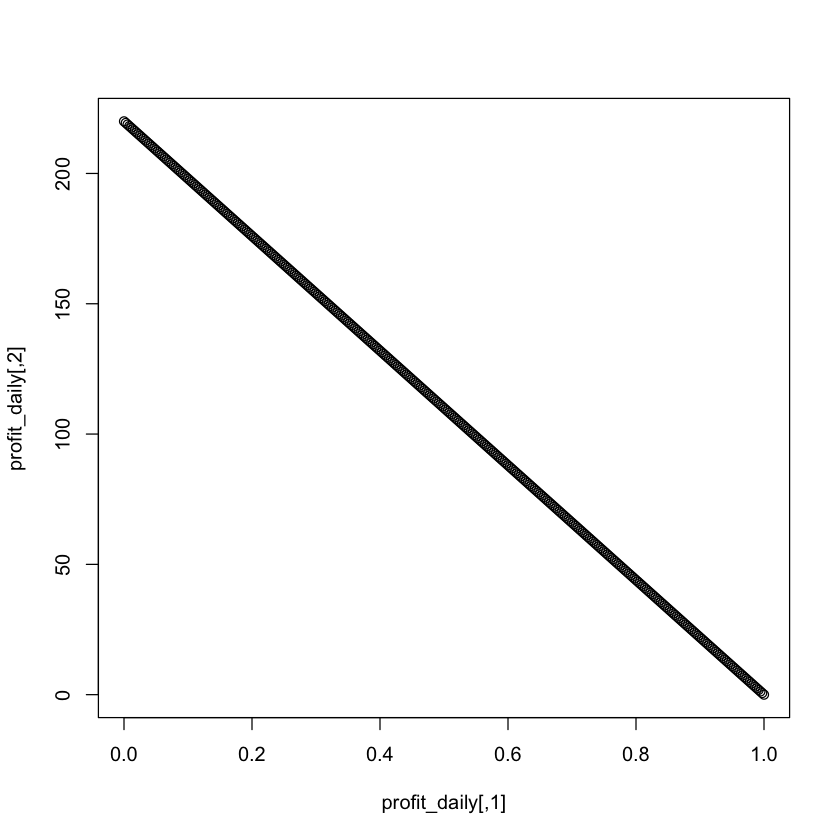

In [1]:
#inputs
T=1
t=0:360/360 #the grid with each day of the year
premiums<-1200
expenses <-180
mu<-0.01
alpha<-320000
beta<-4

#calculate the future expected profit at the beginning of the contract
profit<-premiums-expenses-mu*T*alpha/beta

print(paste("Expected profit at the beginning of the contract:"))
profit

#calculate the future expected profit on unearned exposure for each day of the day
profit_daily<-matrix(ncol=2,nrow=length(t))

for (i in 1:length(t)){
    profit_daily[i,]<-c(t[i],premiums*(T-t[i])-expenses*(T-t[i])-mu*(T-t[i])*alpha/beta)
}

plot(profit_daily)

### Answer point 2
Assume that the premium is paid upfront. Calculate (undiscounted) premium provision (i.e. Solvency II reserve for un-earned exposure) as well as liability for remaining coverage (i.e. accounting reserve according to IFRS 17) for each day of the year and plot both on the same plot. What is the difference?

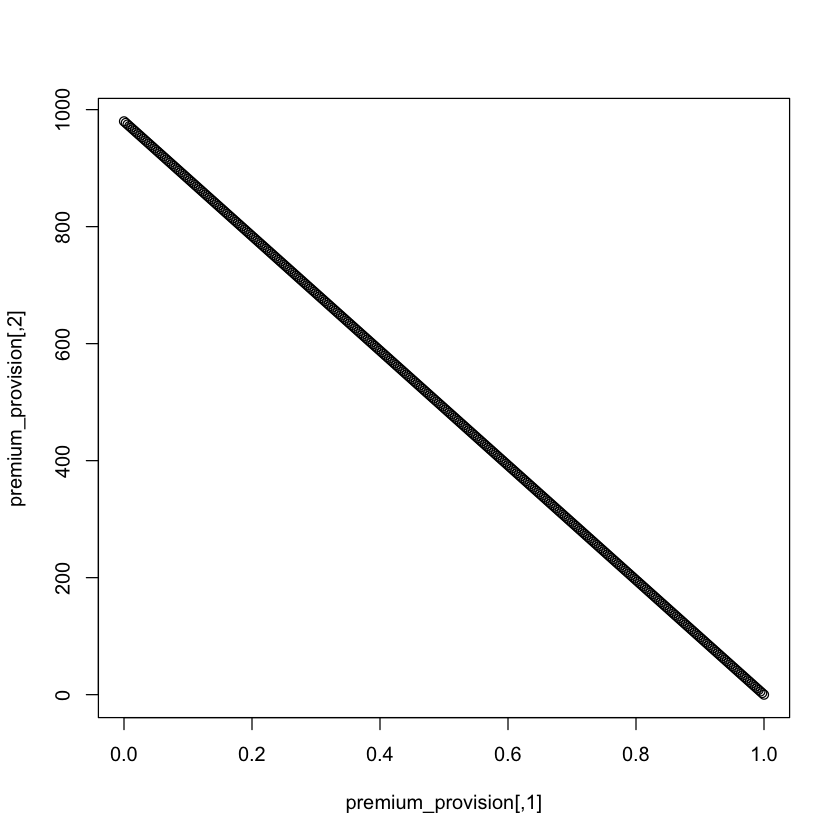

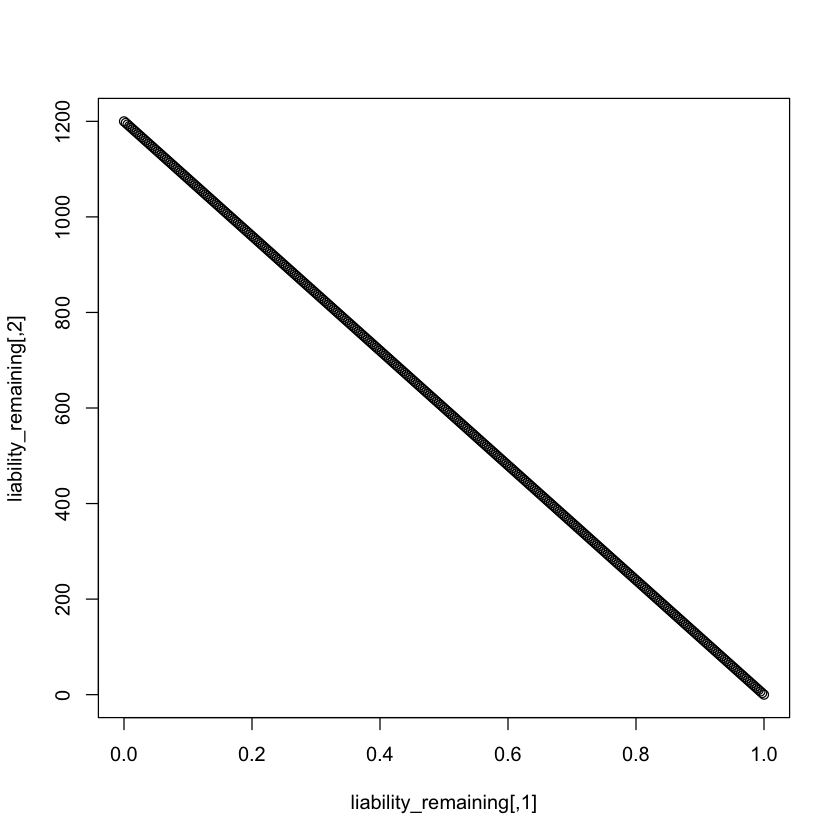

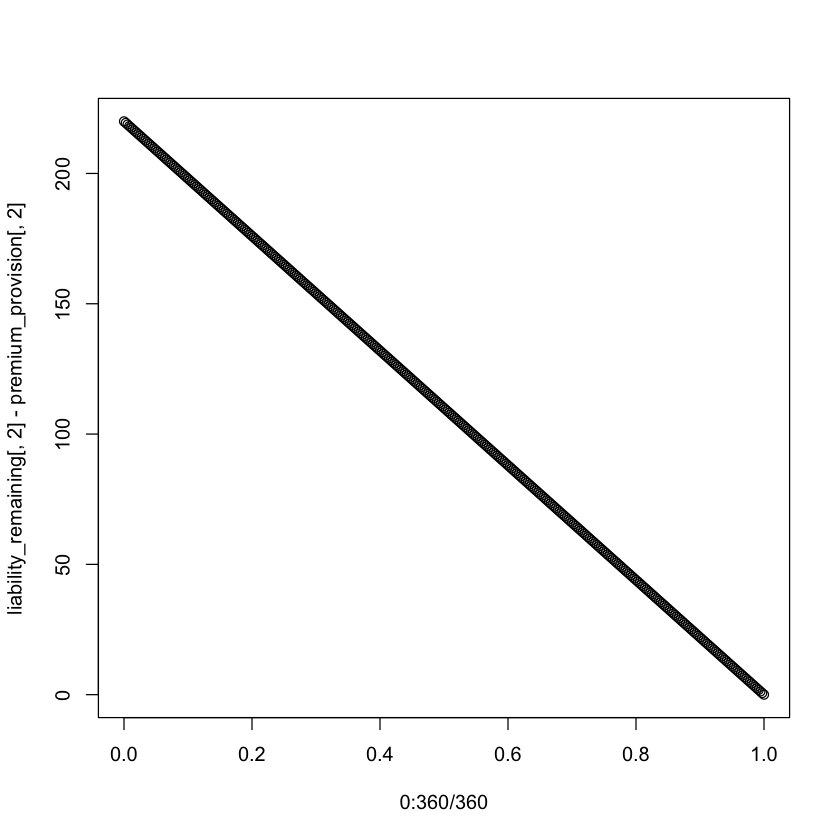

In [3]:
#define the function for premium provision
calculate_undiscounted_premium_provision<-function(start_time=0,end_time=1,t,mu,alpha,beta,premium_cashflows,
                                                   expense_cashflows){
    # start_time, end_time = start and end time for the coverate as a fraction of year
    # t <- current time
    # premium_cashflows, expense_cashflows = matrices with two columns: one is the timing of the cashflow, 
    #      the other is the size of the cashflow
    
    #undiscounted premium provision = -expected future premiums + expected future expenses + expected future claims
    
    #calculate expected future premiums
    future_premiums<-sum(premium_cashflows[premium_cashflows[,1]<=end_time&premium_cashflows[,1]>t,2])
    
    #calculate expected future expenses
    future_expenses<-sum(expense_cashflows[expense_cashflows[,1]<=end_time&expense_cashflows[,1]>t,2])
    
    #calculate expedted future claims
    future_claims<-mu*(end_time-t)*alpha/beta
    
    #calculate and return premium provision
    provision<- -future_premiums+future_expenses+future_claims
    return(provision)
}

#define the function for liability for remaining coverage
calculate_liability_remaining<-function(start_time=0,end_time=1,t,premium_cashflows){
    # start_time, end_time = start and end time for the coverate as a fraction of year
    # t <- current time
    # premium_cashflows = matrix with two columns: one is the timing of the cashflow, 
    #      the other is the size of the cashflow
    
    
    #liability for remaining coverage = unearned premium -expected future premiums
    
    premiums <- sum(premium_cashflows[,2])
    
    #calculate expected future premiums
    future_premiums<-sum(premium_cashflows[premium_cashflows[,1]<=end_time&premium_cashflows[,1]>t,2])
    
    liability_remaining<-0
    if ((t>=start_time)&&(t<end_time)){
        liability_remaining<- premiums*(end_time-t) -future_premiums
    }
    
    return(liability_remaining)
}

#prepare premium cashflow
premium_cashflows <- cbind(0:360/360,c(premiums,rep(0,times=360)))

#prepare expense cashflow
expense_cashflows <-cbind(0:360/360,c(0,expenses*rep(1/360,times=360)))

#calculate premium provision
premium_provision<-matrix(ncol=2,nrow=361)
for (i in 0:360){
    
    premium_provision[i+1,]<-c(i/360,
                               calculate_undiscounted_premium_provision(start_time=0,end_time=1,
                                                                        t=i/360,mu,alpha,beta,
                                                                        premium_cashflows,expense_cashflows))
}

plot(premium_provision)                          
                      
#calculate liability for remaining coverage

liability_remaining<-matrix(ncol=2,nrow=361)
for (i in 0:360){
    
    liability_remaining[i+1,]<-c(i/360,
                               calculate_liability_remaining(start_time=0,end_time=1,t=i/360,premium_cashflows))
}
plot(liability_remaining) 

plot(0:360/360,liability_remaining[,2]-premium_provision[,2])

### Answer point 3
Assume that the premium is paid monthly upfront. Calculate again (undiscounted) premium provision as well as liability for remaining coverage for each day of the year and plot both on the same plot. Compare it to the point 2.

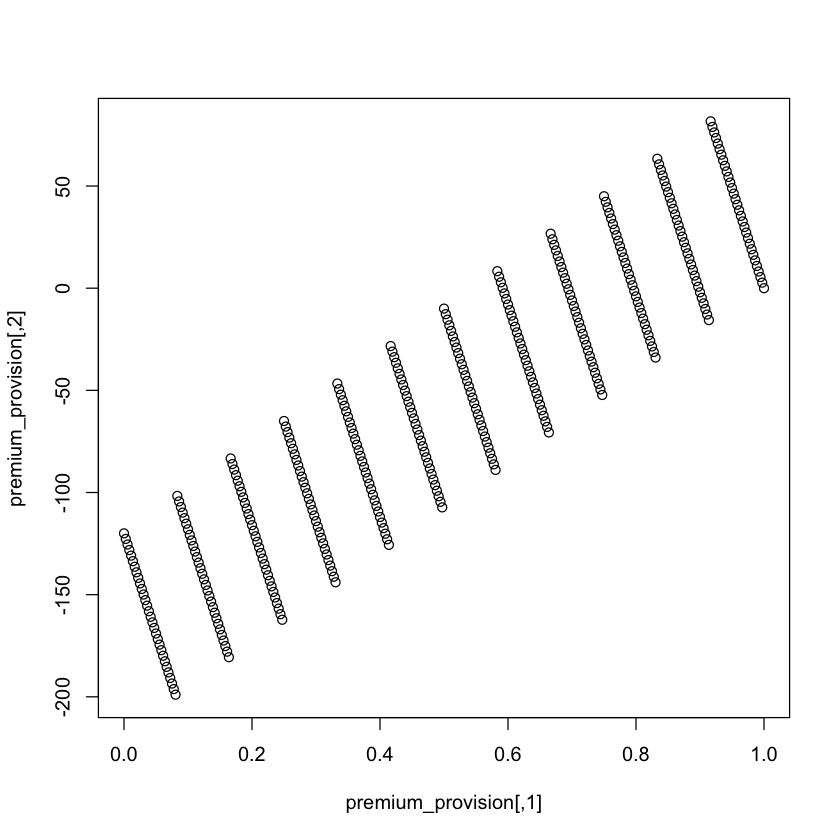

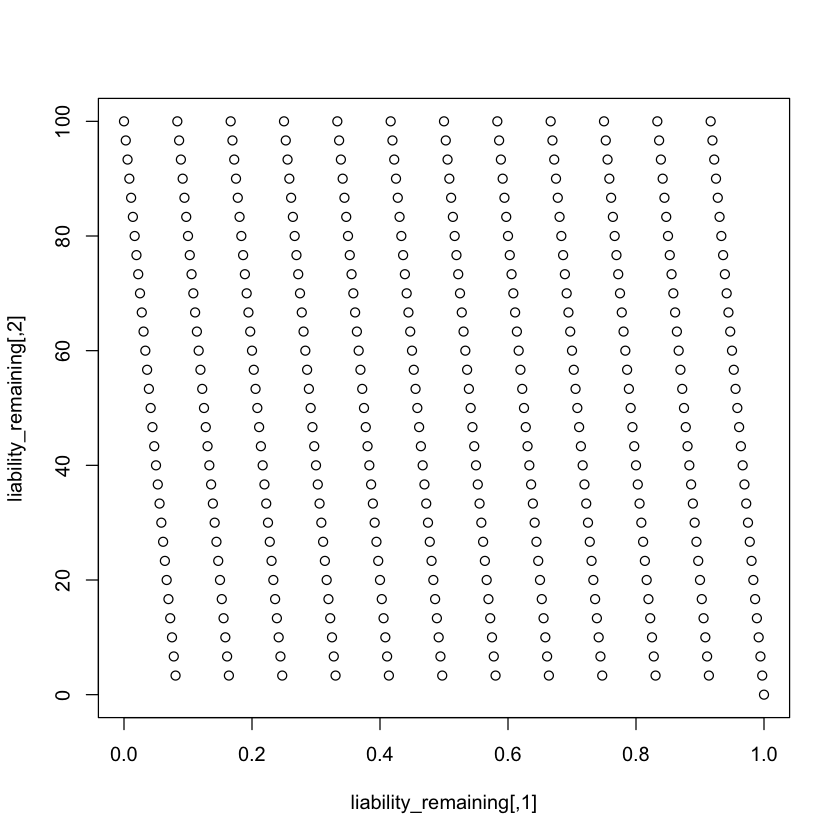

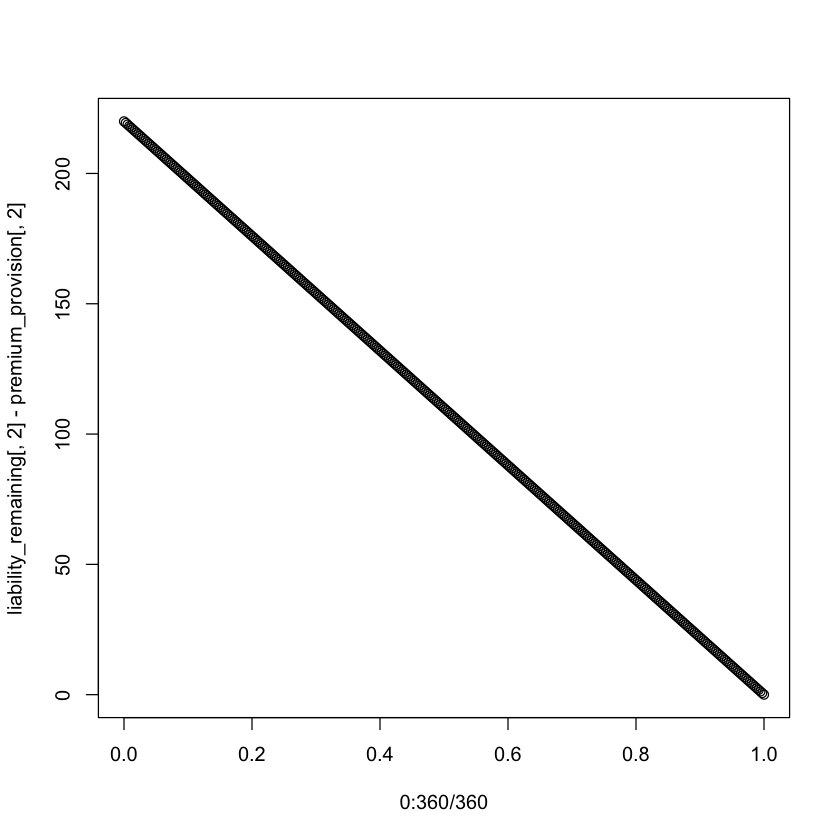

In [13]:
#prepare premium cashflow
premium_cashflows <- cbind(0:360/360,c(rep(0,times=361)))
for (i in 0:11/12){
    premium_cashflows[premium_cashflows[,1]==i,2]<-premiums/12

}

#prepare expense cashflow
expense_cashflows <-cbind(0:360/360,c(0,expenses*rep(1/360,times=360)))

#calculate premium provision
premium_provision<-matrix(ncol=2,nrow=361)
for (i in 0:360){
    premium_provision[i+1,]<-c(i/360,
                               calculate_undiscounted_premium_provision(start_time=0,end_time=1,
                                                                        t=i/360,mu,alpha,beta,
                                                                        premium_cashflows,expense_cashflows))
}

plot(premium_provision)                          
                      
#calculate liability for remaining coverage

liability_remaining<-matrix(ncol=2,nrow=361)
for (i in 0:360){
    
    liability_remaining[i+1,]<-c(i/360,
                               calculate_liability_remaining(start_time=0,end_time=1,t=i/360,premium_cashflows))
}
plot(liability_remaining) 

plot(0:360/360,liability_remaining[,2]-premium_provision[,2])


## Exercise 2 - Undiscounted premium provision for a portfolio 

Assume now that you have 40 policies, each having exactly the same terms (including premiums) and risks as in exercise 1. The difference is that they have been written on different days. The dates when the policies are signed are 15 days apart: the first policy is signed on the 0-day, the second on the 15rd day, third on the 30th day etc. Calculate the premium provision and liability for remeaning coverage for the whole portfolio for each day (i.e from day 0 to day 360+40*15, i.e. the end of the coverage of the last policy)

Assume 
1. one time upfront premium
2. monthly premiums paid upfront.

### Answer point 1

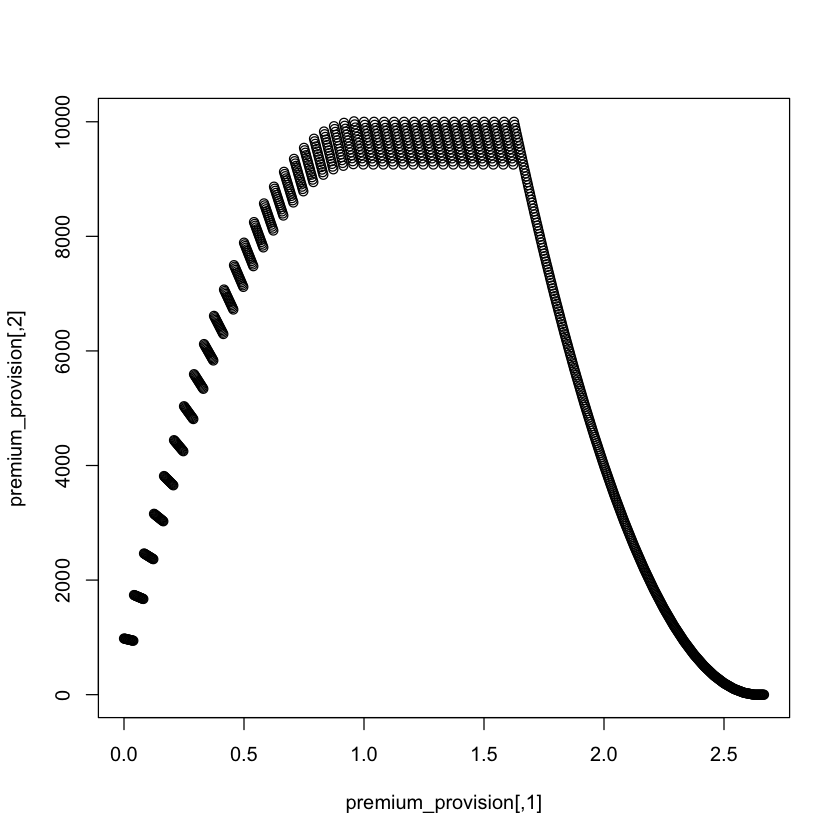

In [15]:

step=15
number_policies=40

#prepare premium cashflow
for (j in 1:number_policies){
   if (j==1){
       premium_cashflows <- cbind(0:360/360,c(premiums,rep(0,times=360)),j)
   } else
       premium_cashflows <- rbind(premium_cashflows,cbind((((j-1)*step):(360+step*(j-1)))/360,c(premiums,rep(0,times=360)),j))
}

#prepare expense cashflow
for (j in 1:number_policies){
   if (j==1){
       expense_cashflows <-cbind(0:360/360,c(0,expenses*rep(1/360,times=360)),j)
   } else
       expense_cashflows <- rbind(expense_cashflows,cbind(0:360/360+(j-1)*step/360,c(expenses,rep(0,times=360)),j))
}


#calculate premium provision
premium_provision<-matrix(ncol=2,nrow=361+step*number_policies)
for (i in 0:(360+step*number_policies)){
    temp<-0
    for (j in 1:number_policies){
        if ((i>=(j-1)*step)&(i<360+(j-1)*step)){
            temp <-temp+calculate_undiscounted_premium_provision(start_time=(j-1)*step/360,end_time=(360+(j-1)*step)/360,
                                                                        t=i/360,mu,alpha,beta,
                                                                        premium_cashflows[premium_cashflows[,3]==j,c(1,2)],
                                                                        expense_cashflows[expense_cashflows[,3]==j,c(1,2)])
        }
        
    premium_provision[i+1,]<-c(i/360,temp)
                               
    }
}

plot(premium_provision)                          
     

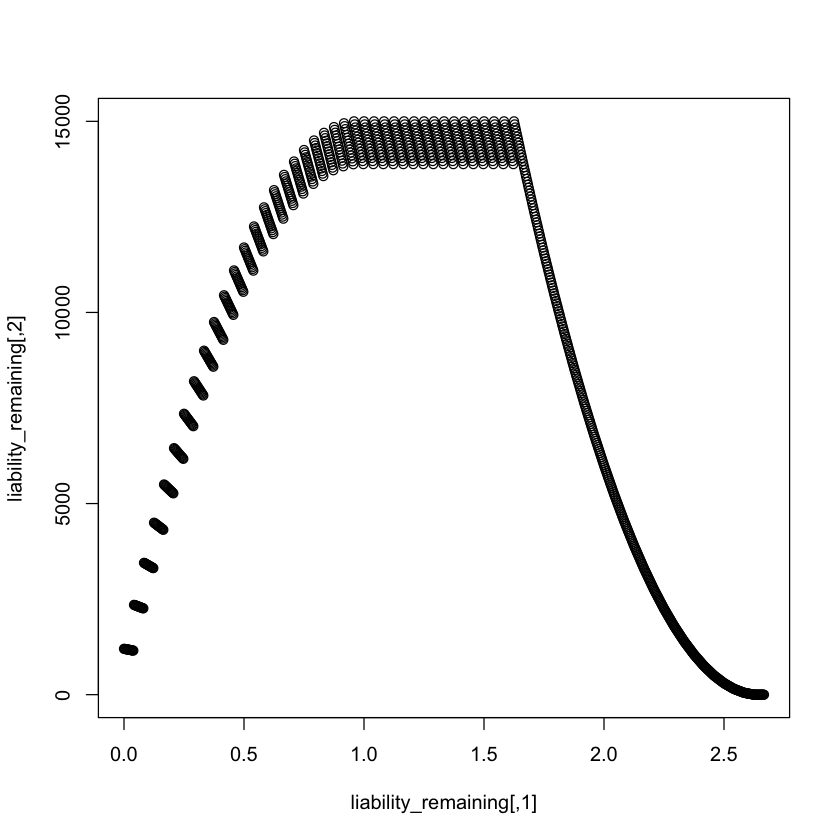

In [19]:
                 
#calculate liability for remaining coverage

liability_remaining<-matrix(ncol=2,nrow=361+step*number_policies)
for (i in 0:(360+step*number_policies)){
    temp<-0
    for (j in 1:number_policies){
        if ((i>=(j-1)*step)&(i<360+(j-1)*step)){
            temp <-temp+calculate_liability_remaining(start_time=(j-1)*step/360,end_time=(360+(j-1)*step)/360,
                                                                t=i/360,
                                                                premium_cashflows[premium_cashflows[,3]==j,c(1,2)])
        }
    }
    liability_remaining[i+1,]<-c(i/360,temp)
}
plot(liability_remaining) 


### Answer point 2

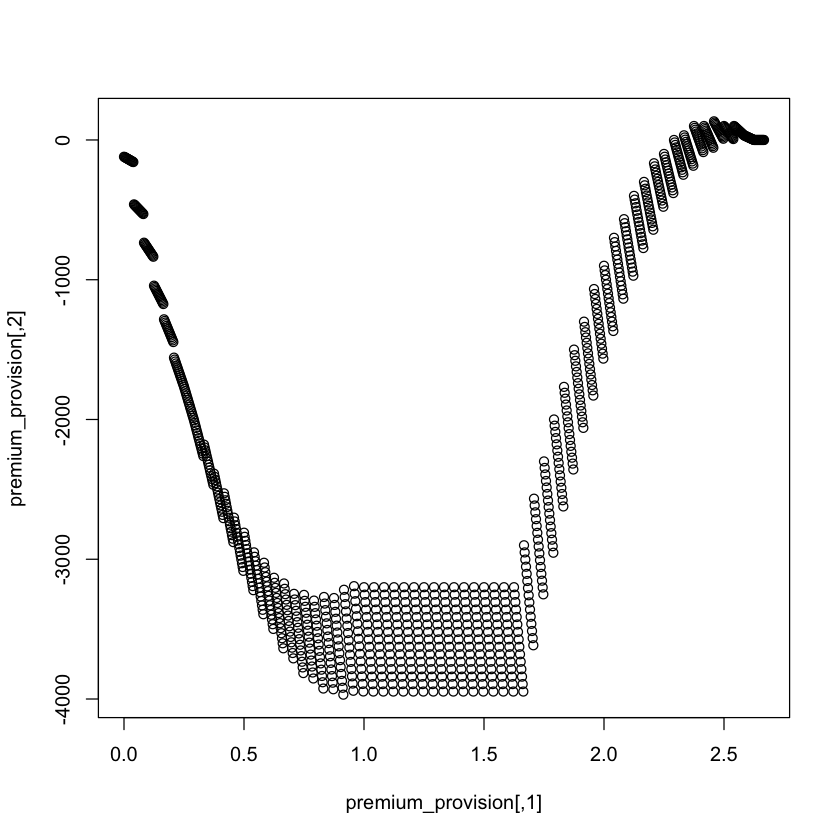

In [156]:
#prepare premium cashflow
for (j in 1:number_policies){
   if (j==1){
       premium_cashflows <- cbind(0:360/360,rep(0,times=361),j)
       for (i in 0:11){
            premium_cashflows[premium_cashflows[,1]==i*30/360,2]<-premiums/12
        }
   } else{
       temp<-cbind((((j-1)*step):(360+step*(j-1)))/360,rep(0,times=361))
       for (i in 0:11){
            temp[temp[,1]==(i*30+((j-1)*step))/360,2]<-premiums/12
        }
       premium_cashflows <- rbind(premium_cashflows,cbind(temp,j))
        
    }
}

#prepare expense cashflow
for (j in 1:number_policies){
   if (j==1){
       expense_cashflows <-cbind(0:360/360,c(0,expenses*rep(1/360,times=360)),j)
   } else
       expense_cashflows <- rbind(expense_cashflows,cbind(0:360/360+(j-1)*step/360,c(expenses,rep(0,times=360)),j))
}


#calculate premium provision
premium_provision<-matrix(ncol=2,nrow=361+step*number_policies)
for (i in 0:(360+step*number_policies)){
    temp<-0
    for (j in 1:number_policies){
        if ((i>=(j-1)*step)&(i<360+(j-1)*step)){
            temp <-temp+calculate_undiscounted_premium_provision(start_time=(j-1)*step/360,end_time=(360+(j-1)*step)/360,
                                                                        t=i/360,mu,alpha,beta,
                                                                        premium_cashflows[premium_cashflows[,3]==j,c(1,2)],
                                                                        expense_cashflows[expense_cashflows[,3]==j,c(1,2)])
        }
        
    premium_provision[i+1,]<-c(i/360,temp)
                               
    }
}

plot(premium_provision)                          
     

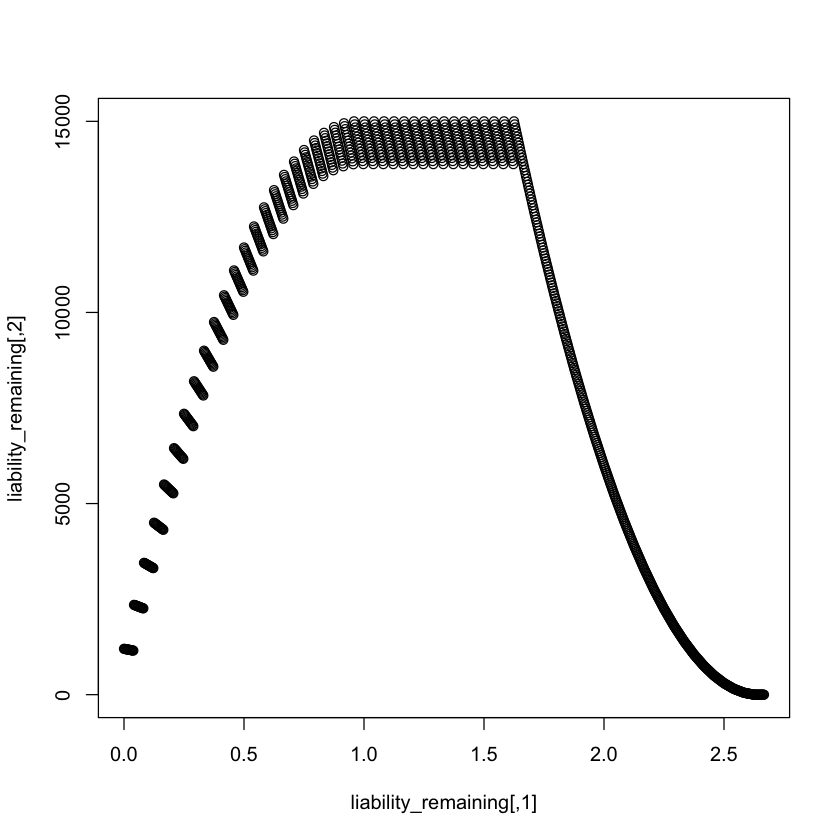

In [20]:
                 
#calculate liability for remaining coverage

liability_remaining<-matrix(ncol=2,nrow=361+step*number_policies)
for (i in 0:(360+step*number_policies)){
    temp<-0
    for (j in 1:number_policies){
        if ((i>=(j-1)*step)&(i<360+(j-1)*step)){
            temp <-temp+calculate_liability_remaining(start_time=(j-1)*step/360,end_time=(360+(j-1)*step)/360,
                                                                t=i/360,
                                                                premium_cashflows[premium_cashflows[,3]==j,c(1,2)])
        }
    }
    liability_remaining[i+1,]<-c(i/360,temp)
}
plot(liability_remaining) 

## Exercise 3 - reserve for earned exposure

Assume that you have a 10000 policies written at t=0, and with end of coverage time t=1. Your pricing team assessed that the claims can be modelled using compound Poisson model, where the number of claims between time $0$ and $1$ can be modelled as $N\sim Poiss(J\mu T)$, where $\mu=0.01$, $J=10000$ and the i-th claim size is modelled as $Z_i\sim \Gamma(32000,4)$ (using shape/rate parametrization. Assume expenses to be 0 in that portfolio. Moreover, you assume that usually after one year, you pay out on average 50% of the total claims, whereas after two years you pay out 75% of the total claim amounts.

1. Compute a priori expected claim amount from that portfolio
2. At t=1, you have paid 5 000 000 kr of claims in that portfolio. What is the reserve for earned premium calculated with naive approach and payment pattern?
3. At t=2, you have paid in total 6 000 000 kr of claims in that portfolio. What is the reserve for earned premium calculated with naive approach and payment pattern?

### Answer point 1
1. Compute a priori expected claim amount from that portfolio

In [157]:
#inputs
T=1
J=10000
mu<-0.01
alpha<-320000
beta<-4

#calculate theoretical mean
expected_value<-alpha/beta*J*mu*T

print(expected_value)

[1] 8e+06


### Answer point 2
2. At t=1, you have paid 5 000 000 kr of claims in that portfolio. What is the reserve for earned premium calculated with naive approach and payment pattern?

In [158]:
#input
paid_1st_year <-5000000
percentage_paid_1st_year <-0.5

reserve_naive <- expected_value-paid_1st_year

print("Reserve with naive approach")
reserve_naive

reserve_payment_pattern<-paid_1st_year/percentage_paid_1st_year-paid_1st_year

print("Reserve with payment pattern approach")
reserve_payment_pattern

[1] "Reserve with naive approach"


[1] 3e+06

[1] "Reserve with payment pattern approach"


[1] 5e+06

### Answer point 3
3. At t=2, you have paid in total 6 000 000 kr of claims in that portfolio. What is the reserve for earned premium calculated with naive approach and payment pattern?

In [160]:
#input
paid_2st_year <-6000000
percentage_paid_2st_year <-0.75

reserve_naive <- expected_value-paid_2st_year

print("Reserve with naive approach")
reserve_naive

reserve_payment_pattern<-paid_2st_year/percentage_paid_2st_year-paid_2st_year

print("Reserve with payment pattern approach")
reserve_payment_pattern

[1] "Reserve with naive approach"


[1] 2e+06

[1] "Reserve with payment pattern approach"


[1] 2e+06

# Exercise 4 - compound Poisson with uncertainty

Write a script for simulating the following compound Poisson models:
1. $X= \sum{i=1}^N Z_i, where N\sim Pois(\mu*J*T), \mu = const., Z_i\sim LN(2,3)$
2. $X= \sum{i=1}^N Z_i, where N\sim Pois(\mu*J*T), \mu \sim\Gamma(\alpha,\beta), Z_i\sim LN(2,3)$


Simulate the first model $n=100 000$ times and compute the mean and standard deviation for parameters $\mu=0.1, T=1$ and $J=100, 1000, 10000$

Simulate the second model $n=100 000$ times and compute the mean and standard deviation for parameters $\alpha=0.1, \beta=1, T=1$ as well as $\alpha=0.05, \beta=0.5$. $J=100, 1000, 10000$.

In [57]:
#program
generate_compound_poiss<-function(mu,J,xi,sigma,m){
    N <- rpois(m,mu*J)
    Xcal <- rep(0,m)
    for(i in 1:m)
      {
            Z <- Z <- rlnorm(N[i],xi,sigma)
            Xcal[i] <- sum(Z)
      }
    return(Xcal)
}

generate_compound_poiss_with_uncertaity<-function(J,alpha,beta,xi,sigma,m){
    lambda <-rgamma(m,shape=alpha,rate=beta)
    
    Xcal =sapply(mu,generate_compound_poiss,J=J,xi=xi,sigma=sigma,m=1)
    return(Xcal)
}



In [49]:
#Output without uncertainty

print("J=100 without uncertainty")
J=100
X <- generate_compound_poiss(mu=0.1,J=J,xi=2,sigma=3,m=1000000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=1000 without uncertainty")
J=1000
X <- generate_compound_poiss(mu=0.1,J=J,xi=2,sigma=3,m=1000000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=10000 without uncertainty")
J=10000
X <- generate_compound_poiss(mu=0.1,J=J,xi=2,sigma=3,m=1000000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

[1] "J=100 without uncertainty"
[1]  67.69941 987.10087  14.58064
[1] "J=1000 without uncertainty"
[1]  66.44206 339.43124   5.10868
[1] "J=10000 without uncertainty"
[1]  66.628541 149.837775   2.248853


In [59]:
#Output with uncertainty
print("J=100 with uncertainty, alpha=0.1, beta=1")
J=100
X <- generate_compound_poiss_with_uncertaity(alpha=0.1,beta=1,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=1000 with uncertainty, alpha=0.1, beta=1")
J=1000
X <- generate_compound_poiss_with_uncertaity(alpha=0.1,beta=1,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=10000 with uncertainty, alpha=0.1, beta=1")
J=10000
X <- generate_compound_poiss_with_uncertaity(alpha=0.1,beta=1,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))


[1] "J=100 with uncertainty, alpha=0.1, beta=1"
[1]   65.90127 1049.09337   15.91917
[1] "J=1000 with uncertainty, alpha=0.1, beta=1"
[1]  66.654318 484.269125   7.265383
[1] "J=10000 with uncertainty, alpha=0.1, beta=1"
[1]  66.427129 282.301581   4.249794


In [60]:
#Output with uncertainty
print("J=100 with uncertainty, alpha=0.05, beta=0.5")
J=100
X <- generate_compound_poiss_with_uncertaity(alpha=0.05,beta=0.5,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=1000 with uncertainty, alpha=0.05, beta=0.5")
J=1000
X <- generate_compound_poiss_with_uncertaity(alpha=0.05,beta=0.5,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

print("J=10000 with uncertainty, alpha=0.05, beta=0.5")
J=10000
X <- generate_compound_poiss_with_uncertaity(alpha=0.05,beta=0.5,J=J,xi=2,sigma=3,m=100000)
print(c(mean(X)/J,sd(X)/J,sd(X)/mean(X)))

[1] "J=100 with uncertainty, alpha=0.05, beta=0.5"
[1]   67.91077 1231.98465   18.14123
[1] "J=1000 with uncertainty, alpha=0.05, beta=0.5"
[1]  66.794724 450.317832   6.741817
[1] "J=10000 with uncertainty, alpha=0.05, beta=0.5"
[1]  66.921153 405.219929   6.055184
